<font color='cyan'>Chrisitan Kelly
Ocean Observed Temperature Final</font>


# 12/14/23 tuo73454@temple.edu 

# For this final project the group I was assigned to had to observe WOA potential temperatures based upon decades from 1955 to 2017 along with a decadel average that covered from 1955 to 2017. Another dataset that we needed to analyze was ocean monthly sea water potential from GFDL-ESM4 from the historical experiment CMIP6 dataset, which was obtained through the google cloud. My specific part of this analysis was to analyze the Atlantic Ocean and Steric Sea Level.

In [1]:
#importing functions to use
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import cartopy.crs as ccrs
import cmocean 
import pandas as pd
import gcsfs
import zarr
gcs = gcsfs.GCSFileSystem(token='anon')

In [2]:
#opening datsets with xarray
woa18_1955_64_potential_temp = xr.open_zarr('/home/ees_student/Kelly_FinalPrG1/data/woa18/woa18_1955_1964_temperature',decode_times=False).potential_temperature
woa18_1965_74_potential_temp = xr.open_zarr('/home/ees_student/Kelly_FinalPrG1/data/woa18/woa18_1965_1974_temperature',decode_times=False).potential_temperature
woa18_1975_84_potential_temp = xr.open_zarr('/home/ees_student/Kelly_FinalPrG1/data/woa18/woa18_1975_1984_temperature',decode_times=False).potential_temperature
woa18_1985_94_potential_temp = xr.open_zarr('/home/ees_student/Kelly_FinalPrG1/data/woa18/woa18_1985_1994_temperature',decode_times=False).potential_temperature
woa18_1994_04_potential_temp = xr.open_zarr('/home/ees_student/Kelly_FinalPrG1/data/woa18/woa18_1995_2004_temperature',decode_times=False).potential_temperature
woa18_2005_17_potential_temp = xr.open_zarr('/home/ees_student/Kelly_FinalPrG1/data/woa18/woa18_2005_2017_temperature',decode_times=False).potential_temperature
woa18_decav_potential_temp = xr.open_zarr('/home/ees_student/Kelly_FinalPrG1/data/woa18/woa18_decav_temperature',decode_times=False).potential_temperature

## This is where we conduct our basin level scales for the global oceans.

In [3]:
woa18_basins = xr.open_dataset('/home/ees_student/Kelly_FinalPrG1/data/basins/woa18_basins_mask.nc',decode_times=False).mask

Text(0.5, 1.0, 'Ocean Basin Mask')

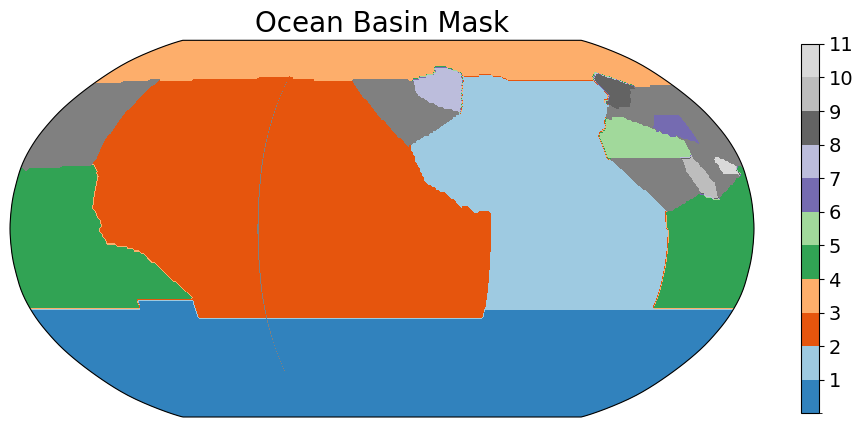

In [4]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_basins.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

#### <font >**Figure 1.**</font> Ocean Basin mask, labelling each of the main ocean basins. The data was provided by World Ocean Atlas 2018 Potential Temperature, NOAA National Centers for Environmental Information Dataset.

In [5]:
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) ### Values 1 over atlantic, NaN elsewhere
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2)) ### Values 1 over atlantic, NaN elsewhere
pacificocean = (woa18_basins.where(woa18_basins==3) / woa18_basins.where(woa18_basins==3))
arcticocean = (woa18_basins.where(woa18_basins==4) / woa18_basins.where(woa18_basins==4))
indianocean = (woa18_basins.where(woa18_basins==5) / woa18_basins.where(woa18_basins==5))

Text(0.5, 1.0, 'Ocean Basin Mask')

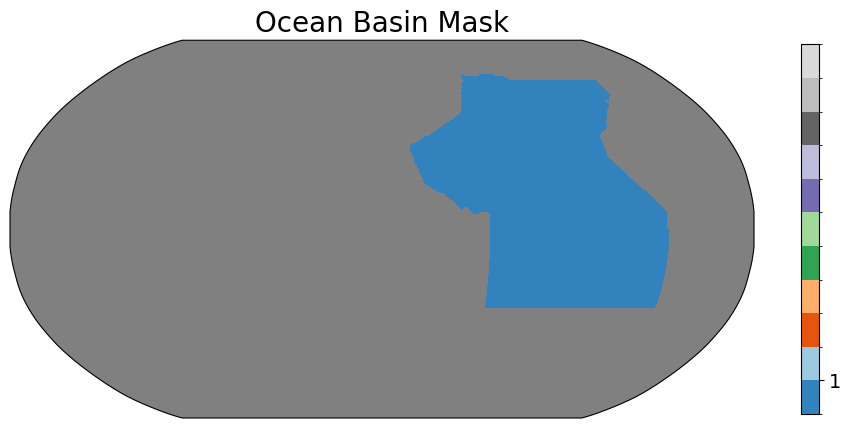

In [6]:
#setting up a basin mask for the atlantic ocean.
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = atlanticocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

#### <font >**Figure 2.**</font> Ocean Basin mask, isolating the Atlantic Ocean. The data was provided by World Ocean Atlas 2018 Potential Temperature, NOAA National Centers for Environmental Information Dataset.

### Now we can multiply our mask by each dataset to isolate just the temperatures over the Atlantic Ocean

In [7]:
woa18_1955_64_atlantic = woa18_1955_64_potential_temp*atlanticocean

In [8]:
woa18_1965_74_atlantic = woa18_1965_74_potential_temp*atlanticocean

In [9]:
woa18_1975_84_atlantic = woa18_1975_84_potential_temp*atlanticocean

In [10]:
woa18_1985_94_atlantic = woa18_1985_94_potential_temp*atlanticocean

In [11]:
woa18_1994_04_atlantic = woa18_1994_04_potential_temp*atlanticocean

In [12]:
woa18_2005_17_atlantic = woa18_2005_17_potential_temp*atlanticocean

In [13]:
woa18_1955_64_atlantic   #checking the dimensions of the dataset so I can more easily work with the data.

<xarray.DataArray (depth: 102, lat: 180, lon: 360)>
dask.array<mul, shape=(102, 180, 360), dtype=float64, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 438.0

Text(0.5, 1.0, 'SST Atlantic 1955 to 1964 averaged')

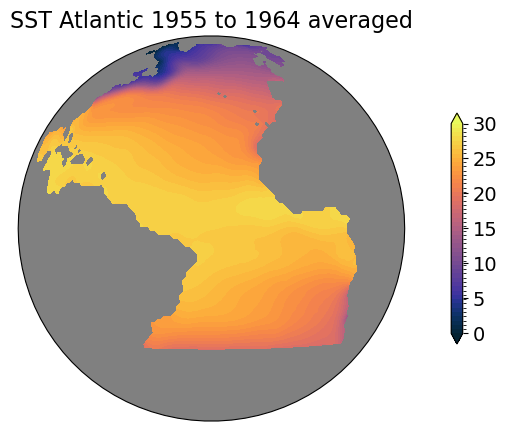

In [14]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,5])

p = woa18_1955_64_atlantic.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,extend = 'both', levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Atlantic 1955 to 1964 averaged",fontsize=16)

#### <font >**Figure 3.**</font> Average sea surface temperature from 1955 to 1964 in the Atlantic Ocean (degrees C). The data was provided by World Ocean Atlas 2018 Potential Temperature, NOAA National Centers for Environmental Information Dataset.


Text(0.5, 1.0, 'SST Atlantic 1965 to 1974 averaged')

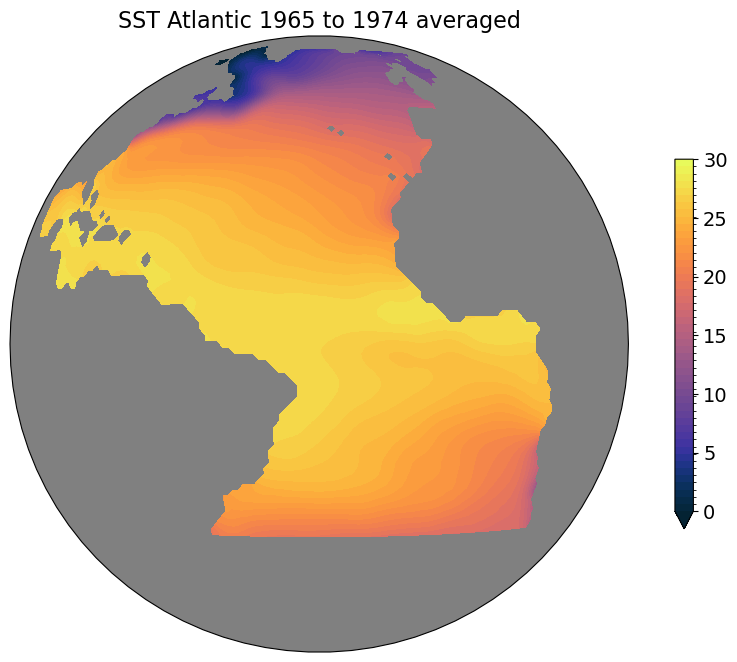

In [15]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1965_74_atlantic.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6, extend ='both')
cb.ax.tick_params(labelsize=14)
plt.title("SST Atlantic 1965 to 1974 averaged",fontsize=16)

#### <font >**Figure 4.**</font> Average sea surface temperature from 1965 to 1974 in the Atlantic Ocean (degrees C). The data was provided by World Ocean Atlas 2018 Potential Temperature, NOAA National Centers for Environmental Information Dataset.



Text(0.5, 1.0, 'SST Atlantic 1975 to 1984 averaged')

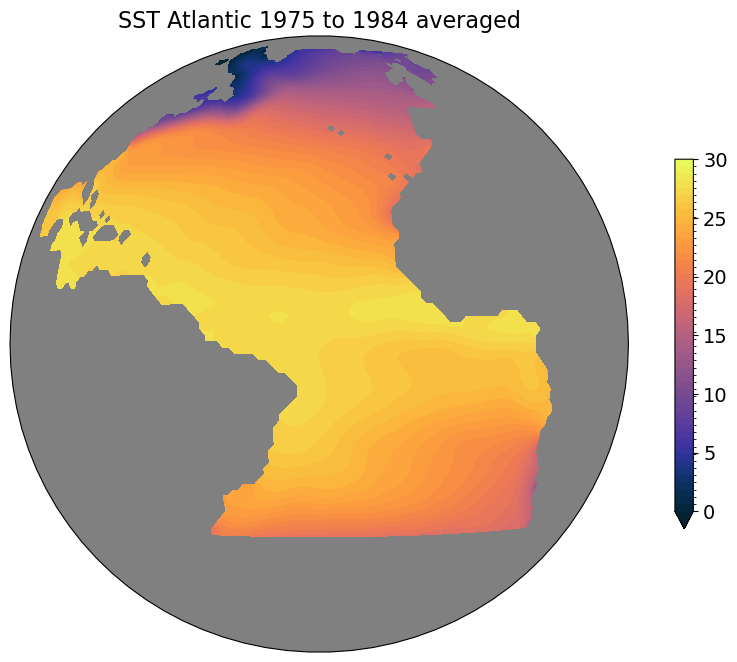

In [16]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1975_84_atlantic.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6, extend ='both')
cb.ax.tick_params(labelsize=14)
plt.title("SST Atlantic 1975 to 1984 averaged",fontsize=16)

#### <font >**Figure 5.**</font> Average sea surface temperature from 1975 to 1984 in the Atlantic Ocean (degrees C). The data was provided by World Ocean Atlas 2018 Potential Temperature, NOAA National Centers for Environmental Information Dataset.

Text(0.5, 1.0, 'SST Atlantic 1985 to 1994 averaged')

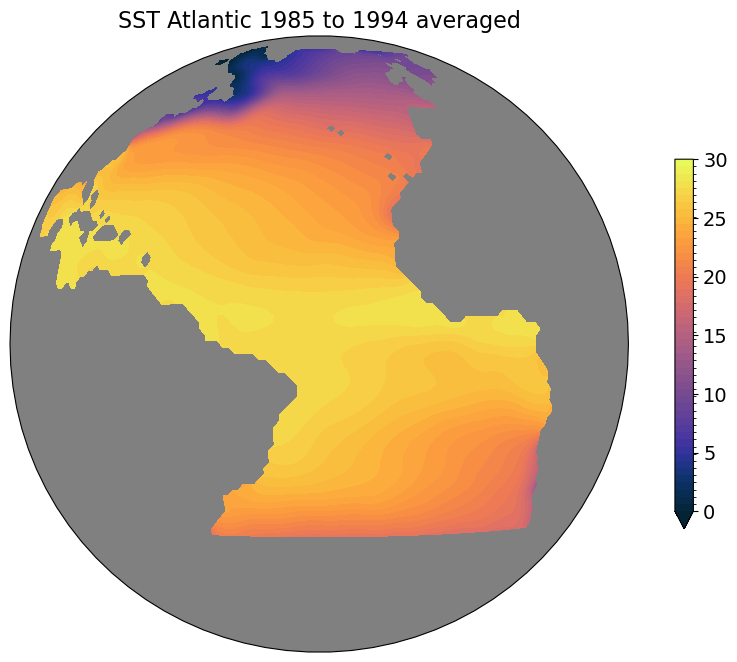

In [17]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1985_94_atlantic.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6, extend ='both')
cb.ax.tick_params(labelsize=14)
plt.title("SST Atlantic 1985 to 1994 averaged",fontsize=16)

#### <font >**Figure 6.**</font> Average sea surface temperature from 1985 to 1994 in the Atlantic Ocean (degrees C). The data was provided by World Ocean Atlas 2018 Potential Temperature, NOAA National Centers for Environmental Information Dataset.

Text(0.5, 1.0, 'SST Atlantic 1994 to 2004 averaged')

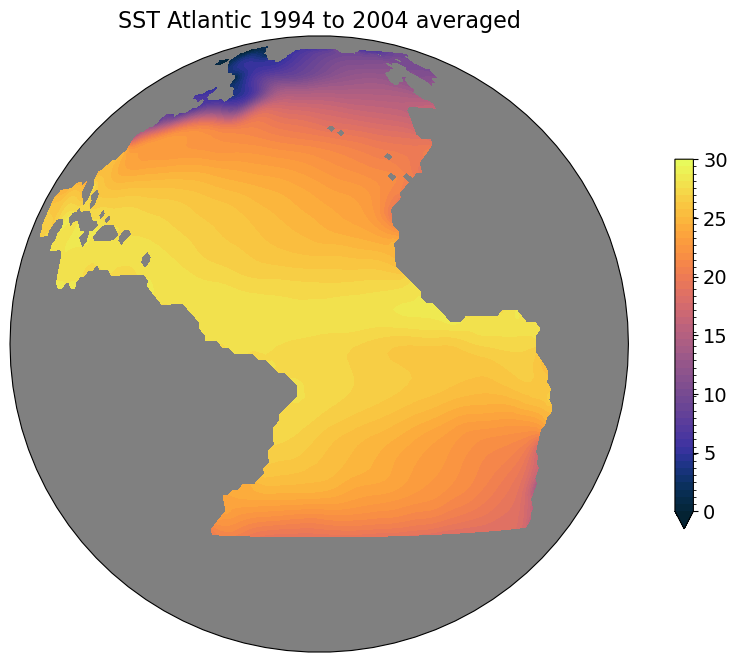

In [18]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,8])

p =woa18_1994_04_atlantic.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6, extend ='both')
cb.ax.tick_params(labelsize=14)
plt.title("SST Atlantic 1994 to 2004 averaged",fontsize=16)

#### <font >**Figure 7.**</font> Average sea surface temperature from 1994 to 2004 in the Atlantic Ocean (degrees C). The data was provided by World Ocean Atlas 2018 Potential Temperature, NOAA National Centers for Environmental Information Dataset.

Text(0.5, 1.0, 'SST Atlantic 2005 to 2017 averaged')

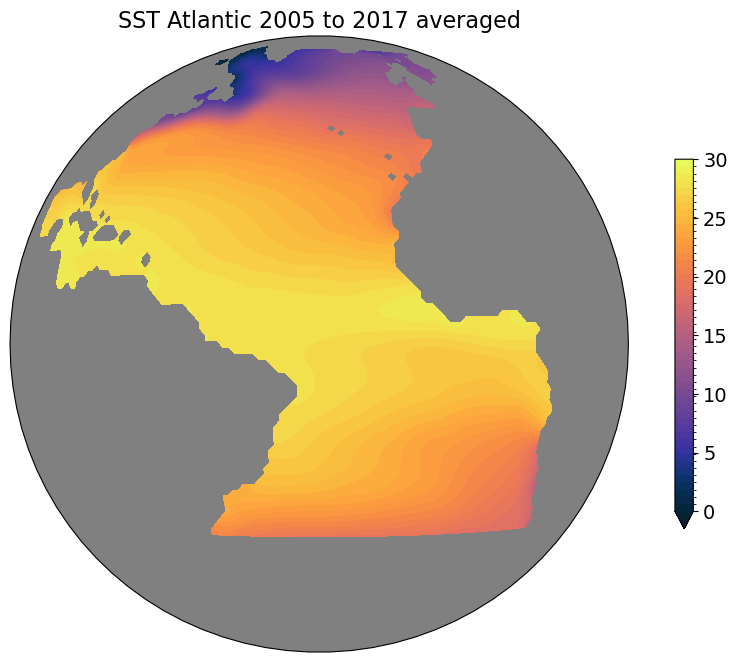

In [19]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,8])

p =woa18_2005_17_atlantic.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6, extend ='both')
cb.ax.tick_params(labelsize=14)
plt.title("SST Atlantic 2005 to 2017 averaged",fontsize=16)

#### <font >**Figure 8.**</font> Average sea surface temperature from 2005 to 2017 in the Atlantic Ocean (degrees C). The data was provided by World Ocean Atlas 2018 Potential Temperature, NOAA National Centers for Environmental Information Dataset.

Text(0.5, 1.0, 'Global SST averaged from 1981 to 2010 ')

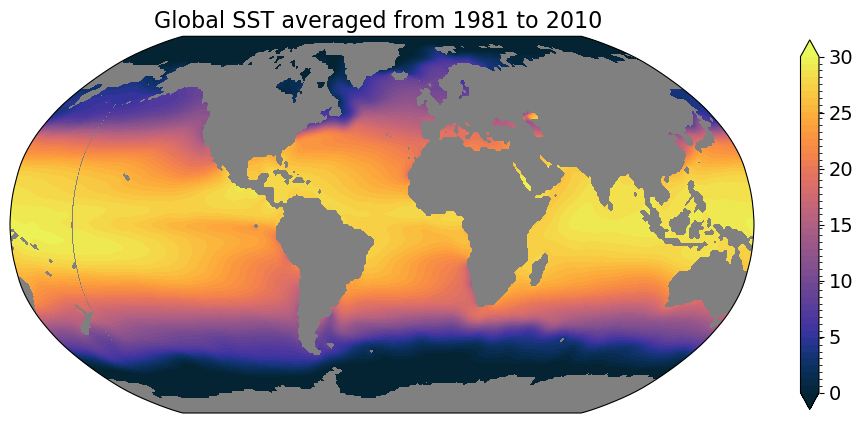

In [20]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_decav_potential_temp.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Global SST averaged from 1981 to 2010 ",fontsize=16)

#### <font >**Figure  9.**</font> Decadel average sea surface temperature from 1981 to 2010 in the Global Oceans (degrees C). The data was provided by World Ocean Atlas 2018 Potential Temperature, NOAA National Centers for Environmental Information Dataset.

#### Math values for sea surface temperature difference across the first observed decade and the last observed decade

In [21]:
woa5564temp = woa18_1955_64_potential_temp.isel(depth=0).mean(dim=['lat','lon']).values
woa5564temp #sea surface temperature values averaged over 1955 to 64

array(13.731425, dtype=float32)

In [22]:
woa0517temp = woa18_2005_17_potential_temp.isel(depth=0).mean(dim=['lat','lon']).values
woa0517temp #sea surface temperature values averaged over 2005 to 2017

array(14.060434, dtype=float32)

In [23]:
woa5564std = woa18_1955_64_potential_temp.isel(depth=0).std(dim=['lat','lon']).values
woa5564std #sea surface temperature standard deviation over 1955 to 64

array(11.206571, dtype=float32)

In [24]:
woa0517std = woa18_2005_17_potential_temp.isel(depth=0).std(dim=['lat','lon']).values
woa0517std #sea surface temperature standard deviation over 2005 to 2017

array(11.413925, dtype=float32)

In [25]:
woa0517std - woa5564std  #seeing how much global temperature standard deviation there was

0.20735455

In [26]:
woa0517temp - woa5564temp # seeing how much global temperature sst increased for the presentation

0.32900906

## Now we can subtract the datasets to find the differences in temperature between the decades in the Atlantic Ocean


In [27]:
difference55_74 = woa18_1965_74_atlantic - woa18_1955_64_atlantic
difference55_84 = woa18_1975_84_atlantic - woa18_1955_64_atlantic
difference55_94 = woa18_1985_94_atlantic - woa18_1955_64_atlantic
difference55_04 = woa18_1994_04_atlantic - woa18_1955_64_atlantic
difference55_17 = woa18_2005_17_atlantic - woa18_1955_64_atlantic

Text(0.5, 1.0, 'Atlantic SST difference from 1955 to 1974')

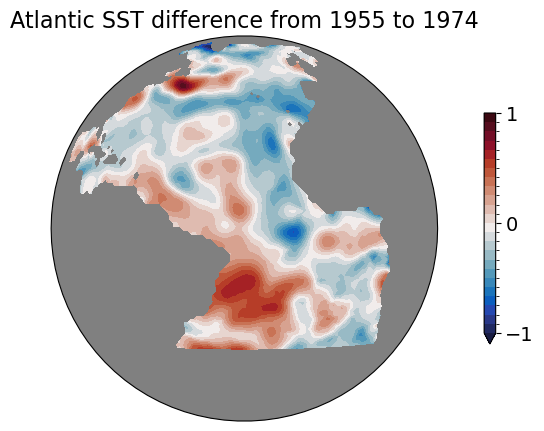

In [28]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,5])

p = difference55_74.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[-1,0,1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Atlantic SST difference from 1955 to 1974",fontsize=16)

#### <font >**Figure  10.**</font> Average sea surface temperature difference from ((1965–1975)–(1955–1964)) in the Atlantic Ocean (degrees C). The data was provided by World Ocean Atlas 2018 Potential Temperature, NOAA National Centers for Environmental Information Dataset.

Text(0.5, 1.0, 'Atlantic SST difference from 1955 to 1984')

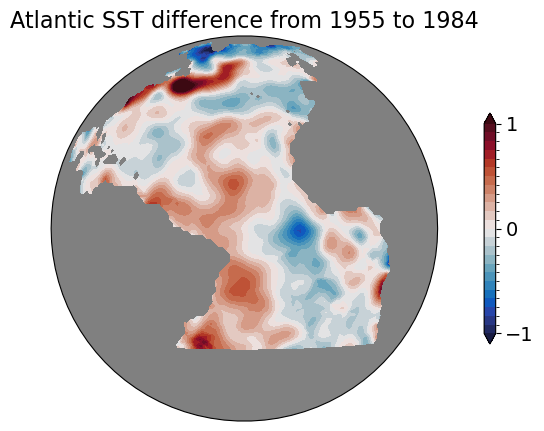

In [29]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,5])

p = difference55_84.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[-1,0,1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Atlantic SST difference from 1955 to 1984",fontsize=16)

#### <font >**Figure  11.**</font> Average sea surface temperature difference from ((1975–1984)–(1955–1964)) in the Atlantic Ocean (degrees C). The data was provided by World Ocean Atlas 2018 Potential Temperature, NOAA National Centers for Environmental Information Dataset.

Text(0.5, 1.0, 'Atlantic SST difference from 1955 to 1994')

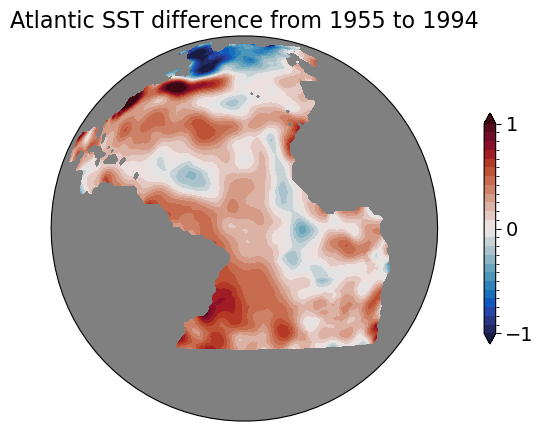

In [30]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,5])

p = difference55_94.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[-1,0,1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Atlantic SST difference from 1955 to 1994",fontsize=16)

#### <font >**Figure  12.**</font> Average sea surface temperature difference from ((1985–1994)–(1955–1964)) in the Atlantic Ocean (degrees C). The data was provided by World Ocean Atlas 2018 Potential Temperature, NOAA National Centers for Environmental Information Dataset.

Text(0.5, 1.0, 'Atlantic SST difference from 1955 to 2004')

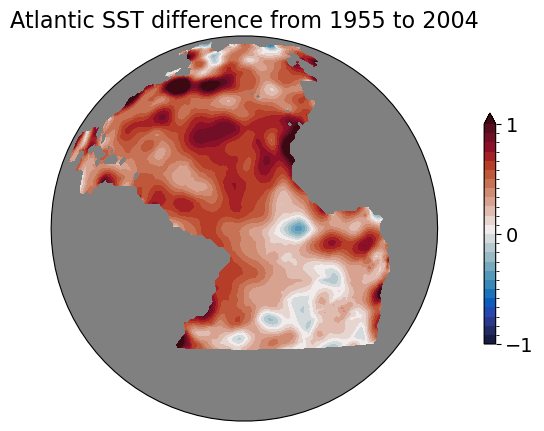

In [31]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,5])

p = difference55_04.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[-1,0,1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Atlantic SST difference from 1955 to 2004",fontsize=16)

#### <font >**Figure  13.**</font> Average sea surface temperature difference from ((1994–2004)–(1955–1964)) in the Atlantic Ocean (degrees C). The data was provided by World Ocean Atlas 2018 Potential Temperature, NOAA National Centers for Environmental Information Dataset.

Text(0.5, 1.0, 'Atlantic SST difference from 1955 to 2017')

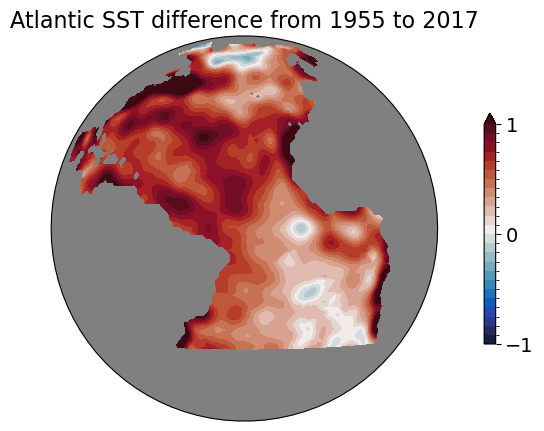

In [32]:
subplot_kws = dict(projection=ccrs.Geostationary(central_longitude=-30),facecolor='grey')

plt.figure(figsize=[12,5])

p = difference55_17.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[-1,0,1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Atlantic SST difference from 1955 to 2017",fontsize=16)

#### <font >**Figure  14.**</font> Average sea surface temperature difference from ((2005–2017)–(1955–1964)) in the Atlantic Ocean (degrees C). The data was provided by World Ocean Atlas 2018 Potential Temperature, NOAA National Centers for Environmental Information Dataset.

# Here it is easier to see the influence of the AMOC (Atlantic Meridional Overturning Circulation) and its effect on the temperatures and current flows of the Atlantic ocean. The area near the gulf stream is rapidly increasing in temperature and bringing warmer waters to the North Atlantic near the Arctic. This water will mix with other watermasses and become more salinated. Salinity is proportional to density so the salty waters in the North Atlantic  will sink, overturn, and start to move south, bringing cold waters from the Arctic to the equator. This circulation is called North Atlantic Deep Water (NADW)

## Doing calculations for average temperatures across decades and the standard deviations that go along with them

In [33]:
#values in celcius for decadel average for the Atlantic 
decavmean = woa18_decav_potential_temp.isel(depth=0).mean(dim=['lat','lon']).values
decavmean

array(13.840977, dtype=float32)

In [34]:
#values in celcius for decadel std for the Atlantic 
decavstd = woa18_decav_potential_temp.isel(depth=0).std(dim=['lat','lon']).values
decavstd

array(11.286581, dtype=float32)

In [35]:
#mean temperature values for the 1955 to 1964 decade in the Atlantic
woa1955to1964mean = woa18_1955_64_potential_temp.isel(depth=0).sel(lat=slice(-38,68)).mean(dim=['lat','lon']).values
woa1955to1964mean

array(21.723505, dtype=float32)

In [36]:
#std of temperature values for the 1955 to 1964 decade in the Atlantic

woa1955to1964std = woa18_1955_64_potential_temp.isel(depth=0).sel(lat=slice(-38,68)).std(dim=['lat','lon']).values
woa1955to1964std

array(6.8587017, dtype=float32)

In [37]:
#mean temperature values for the 2005 to 2017 decade in the Atlantic
woa2005to2017mean = woa18_2005_17_potential_temp.isel(depth=0).sel(lat=slice(-38,68)).mean(dim=['lat','lon']).values
woa2005to2017mean

array(22.21108, dtype=float32)

In [38]:
#std of temperature values for the 2005 to 2017 decade in the Atlantic
woa2005to2017std = woa18_2005_17_potential_temp.isel(depth=0).sel(lat=slice(-38,68)).std(dim=['lat','lon']).values
woa2005to2017std

array(6.928635, dtype=float32)

In [39]:
percdif = [(woa2005to2017mean - woa1955to1964mean) / woa1955to1964mean] #percent difference 
percdif[0]*100

2.244460768997669

# Loading in the steric sea level data across the top 700m and the top 2000m of the ocean

In [40]:

steric_sealvl_0_700 = xr.open_dataset('/home/ees_student/Kelly_FinalPrG1/data/heat_content_sea_level/mean_total_steric_sea_level_anomaly_0-700_yearly.nc',
                                     decode_times=False)
steric_sealvl_0_2000 = xr.open_dataset('/home/ees_student/Kelly_FinalPrG1/data/heat_content_sea_level/mean_total_steric_sea_level_anomaly_0-2000_yearly.nc', 
                                      decode_times=False)
#### reading in the steric sea level datasets 

In [41]:
steric_sealvl_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    s_mm_fs             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_s_mm_se_IO    (time) float32 ...
    yearl_s_mm_NI       (time) float32 ...
    yearl_s_mm_se_NI    (time) float32 ...
    yearl_s_mm_SI       (time) float32 ...
    yearl_s_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean total steric sea level anomalies fr...
    summary:                         Mean total steric sea level anomaly from...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

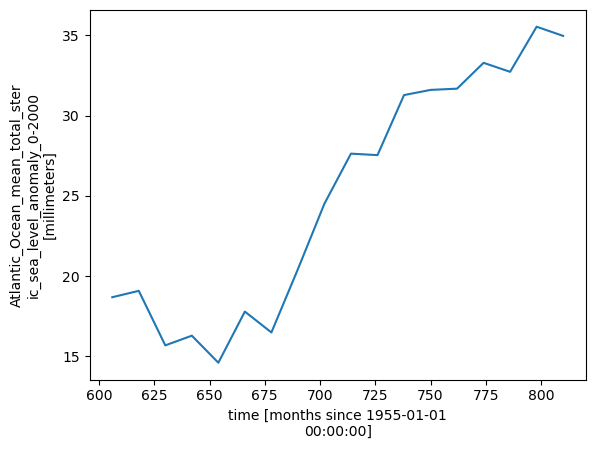

In [42]:
#steric sea level plot for the atlantic ocean across the top 2000m 
steric_sealvl_0_2000.yearl_s_mm_AO.plot()

In [43]:
#mean value for the sea level across the top 2000m
steric_sealvl_0_2000.yearl_s_mm_AO.mean()

<xarray.DataArray 'yearl_s_mm_AO' ()>
array(24.993223, dtype=float32)

In [44]:
#accesssing the steric data for each ocean from 700m
steric700WO = steric_sealvl_0_700.yearl_s_mm_WO
steric700AO = steric_sealvl_0_700.yearl_s_mm_AO
steric700PO = steric_sealvl_0_700.yearl_s_mm_PO
steric700IO = steric_sealvl_0_700.yearl_s_mm_IO
steric700SH = steric_sealvl_0_700.yearl_s_mm_SH
steric700NH = steric_sealvl_0_700.yearl_s_mm_NH
steric700NA = steric_sealvl_0_700.yearl_s_mm_NA
steric700NP = steric_sealvl_0_700.yearl_s_mm_NP
steric700NI = steric_sealvl_0_700.yearl_s_mm_NI
steric700SA = steric_sealvl_0_700.yearl_s_mm_SA
steric700SP = steric_sealvl_0_700.yearl_s_mm_SP
steric700SI = steric_sealvl_0_700.yearl_s_mm_SI


In [45]:
#accesssing the steric data for each ocean from 2000m
steric2000WO = steric_sealvl_0_2000.yearl_s_mm_WO
steric2000AO = steric_sealvl_0_2000.yearl_s_mm_AO
steric2000PO = steric_sealvl_0_2000.yearl_s_mm_PO
steric2000IO = steric_sealvl_0_2000.yearl_s_mm_IO
steric2000SH = steric_sealvl_0_2000.yearl_s_mm_SH
steric2000NH = steric_sealvl_0_2000.yearl_s_mm_NH
steric2000NA = steric_sealvl_0_2000.yearl_s_mm_NA
steric2000NP = steric_sealvl_0_2000.yearl_s_mm_NP
steric2000NI = steric_sealvl_0_2000.yearl_s_mm_NI
steric2000SA = steric_sealvl_0_2000.yearl_s_mm_SA
steric2000SP = steric_sealvl_0_2000.yearl_s_mm_SP
steric2000SI = steric_sealvl_0_2000.yearl_s_mm_SI

In [46]:
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'] # creating a list of years
steric700years = steric_sealvl_0_700.drop(labels='time').assign_coords({'time':years}) #assigning time labels to years
steric700WOyears = steric700WO.drop(labels='time').assign_coords({'time':years}) #doing it for each ocean
steric700AOyears = steric700AO.drop(labels='time').assign_coords({'time':years}) 
steric700POyears = steric700PO.drop(labels='time').assign_coords({'time':years})
steric700IOyears = steric700IO.drop(labels='time').assign_coords({'time':years})
steric700SHyears = steric700SH.drop(labels='time').assign_coords({'time':years})
steric700NHyears = steric700NH.drop(labels='time').assign_coords({'time':years})
steric700NAyears = steric700NA.drop(labels='time').assign_coords({'time':years})
steric700NPyears = steric700NP.drop(labels='time').assign_coords({'time':years})
steric700NIyears = steric700NI.drop(labels='time').assign_coords({'time':years})
steric700SAyears = steric700SA.drop(labels='time').assign_coords({'time':years})
steric700SPyears = steric700SP.drop(labels='time').assign_coords({'time':years})
steric700SIyears = steric700SI.drop(labels='time').assign_coords({'time':years})

In [47]:
steric2000years = steric_sealvl_0_700.drop(labels='time').assign_coords({'time':years}) #assigning time labels to years
steric2000WOyears = steric2000WO.drop(labels='time').assign_coords({'time':years}) #doing it for each ocean
steric2000AOyears = steric2000AO.drop(labels='time').assign_coords({'time':years})
steric2000POyears = steric2000PO.drop(labels='time').assign_coords({'time':years})
steric2000IOyears = steric2000IO.drop(labels='time').assign_coords({'time':years})
steric2000SHyears = steric2000SH.drop(labels='time').assign_coords({'time':years})
steric2000NHyears = steric2000NH.drop(labels='time').assign_coords({'time':years})
steric2000NAyears = steric2000NA.drop(labels='time').assign_coords({'time':years})
steric2000NPyears = steric2000NP.drop(labels='time').assign_coords({'time':years})
steric2000NIyears = steric2000NI.drop(labels='time').assign_coords({'time':years})
steric2000SAyears = steric2000SA.drop(labels='time').assign_coords({'time':years})
steric2000SPyears = steric2000SP.drop(labels='time').assign_coords({'time':years})
steric2000SIyears = steric2000SI.drop(labels='time').assign_coords({'time':years})

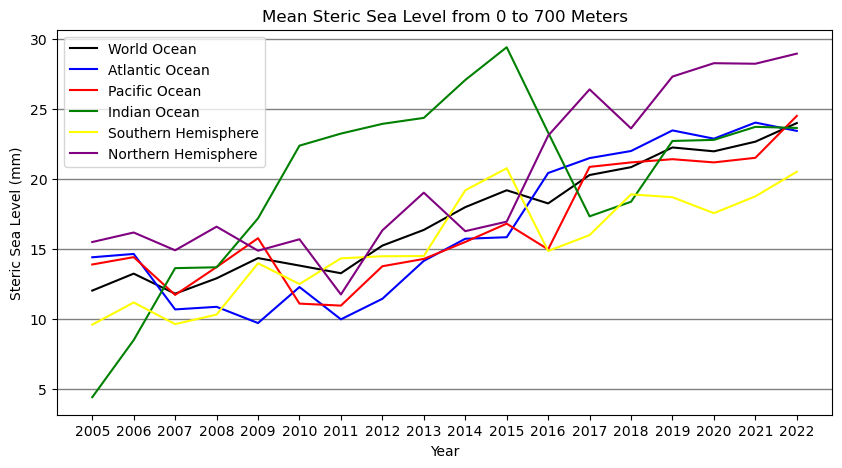

In [48]:
#orional map for mean steric sea level
fig, ax = plt.subplots(figsize = (10,5))
steric700WOyears.plot(label ='World Ocean', color ='k')
steric700AOyears.plot(label = 'Atlantic Ocean', color ='b')
steric700POyears.plot(label = 'Pacific Ocean', color = 'red')
steric700IOyears.plot(label = 'Indian Ocean', color = 'green')
steric700SHyears.plot(label = 'Southern Hemisphere' , color = 'yellow')
steric700NHyears.plot(label='Northern Hemisphere', color = 'purple')
plt.title('Mean Steric Sea Level from 0 to 700 Meters')
plt.xlabel('Year')
plt.ylabel('Steric Sea Level (mm)')
plt.legend()
plt.grid(which='major', axis='y', color = 'grey', linewidth = '1')

In [49]:
#a different way of creating a list of years to use for the sea level plots
years_0_700_steric_sealvl_0_700 = pd.date_range("2005","2023", freq="Y")
steric_700 = steric_sealvl_0_700.drop(labels='time').assign_coords(coords={"time":years_0_700_steric_sealvl_0_700})
years_0_2000_steric_sealvl_0_2000 = pd.date_range("2005","2023", freq="Y")
steric_2000 = steric_sealvl_0_2000.drop(labels='time').assign_coords(coords={"time":years_0_2000_steric_sealvl_0_2000})

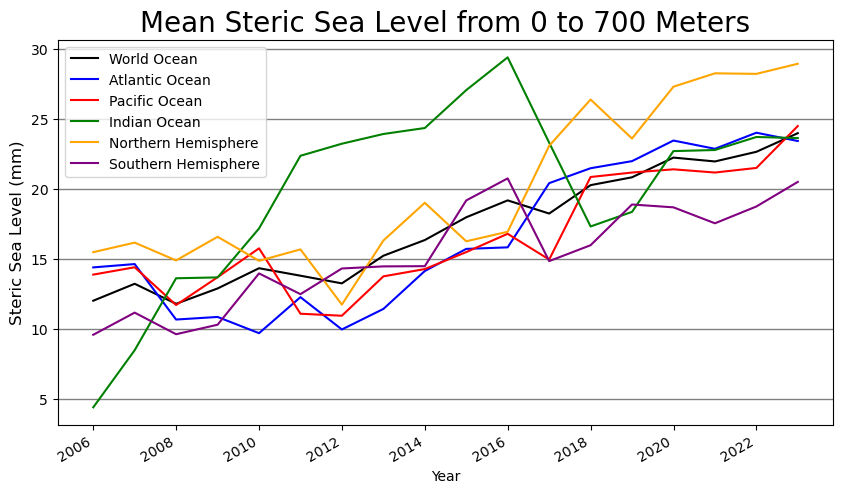

In [50]:
#main graph for Mean steric sea level across the global oceans from a depth of 0 to 700m 
fig, ax = plt.subplots(figsize = (10,5))
steric_700.yearl_s_mm_WO.plot(label = 'World Ocean' ,linewidth=1.5, color = 'k')
steric_700.yearl_s_mm_AO.plot(label = 'Atlantic Ocean' ,linewidth=1.5, color = 'blue')
steric_700.yearl_s_mm_PO.plot(label = 'Pacific Ocean' ,linewidth=1.5, color = 'red')
steric_700.yearl_s_mm_IO.plot(label = 'Indian Ocean' ,linewidth=1.5, color = 'green')
steric_700.yearl_s_mm_NH.plot(label = 'Northern Hemisphere' ,linewidth=1.5, color = 'orange')
steric_700.yearl_s_mm_SH.plot(label = 'Southern Hemisphere' ,linewidth=1.5, color = 'purple')
plt.title('Mean Steric Sea Level from 0 to 700 Meters', fontsize = 20)
plt.xlabel('Year')
plt.ylabel('Steric Sea Level (mm)', fontsize = 12)
plt.legend()
plt.grid(which='major', axis='y', color = 'grey', linewidth = '1')

#### <font >**Figure  15.**</font>  Mean Steric sea level change in the global ocean basins between a depth of 0 to 700m from 2005 to 2022. The data was provided by NOAA under a joint project between NCEI and NOAA Global Ocean Monitoring and Observing (GOMO).

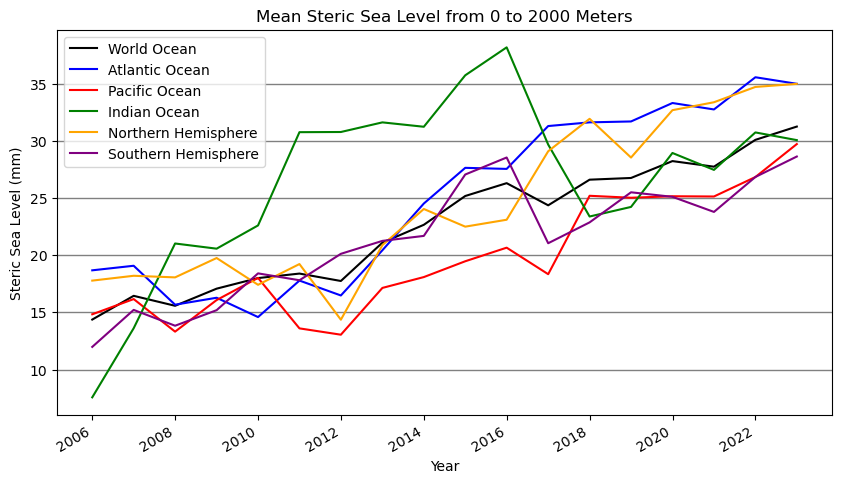

In [51]:
fig, ax = plt.subplots(figsize = (10,5))
steric_2000.yearl_s_mm_WO.plot(label = 'World Ocean' ,linewidth=1.5, color = 'k')
steric_2000.yearl_s_mm_AO.plot(label = 'Atlantic Ocean' ,linewidth=1.5, color = 'blue')
steric_2000.yearl_s_mm_PO.plot(label = 'Pacific Ocean' ,linewidth=1.5, color = 'red')
steric_2000.yearl_s_mm_IO.plot(label = 'Indian Ocean' ,linewidth=1.5, color = 'green')
steric_2000.yearl_s_mm_NH.plot(label = 'Northern Hemisphere' ,linewidth=1.5, color = 'orange')
steric_2000.yearl_s_mm_SH.plot(label = 'Southern Hemisphere' ,linewidth=1.5, color = 'purple')
plt.title('Mean Steric Sea Level from 0 to 2000 Meters')
plt.xlabel('Year')
plt.ylabel('Steric Sea Level (mm)')
plt.legend()
plt.grid(which='major', axis='y', color = 'grey', linewidth = '1')

#### <font >**Figure  16.**</font>  Mean Steric sea level change in the global ocean basins between a depth of 0 to 2000m from 2005 to 2022. The data was provided by NOAA under a joint project between NCEI and NOAA Global Ocean Monitoring and Observing (GOMO).

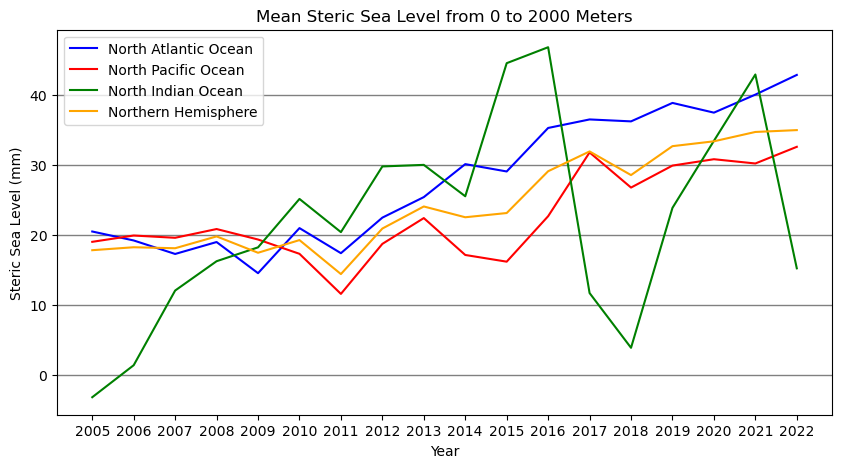

In [52]:
fig, ax = plt.subplots(figsize = (10,5))
steric2000NAyears.plot(label = 'North Atlantic Ocean' , color = 'b')
steric2000NPyears.plot(label = 'North Pacific Ocean', color = 'red')
steric2000NIyears.plot(label = 'North Indian Ocean', color = 'green')
steric2000NHyears.plot(label='Northern Hemisphere', color = 'orange')


plt.title('Mean Steric Sea Level from 0 to 2000 Meters')
plt.xlabel('Year')
plt.ylabel('Steric Sea Level (mm)')
plt.legend()
plt.grid(which='major', axis='y', color = 'grey', linewidth = '1')

#### <font >**Figure  17.**</font>  Mean Steric sea level change in the Northern Hemisphere ocean basins between a depth of 0 to 2000m from 2005 to 2022. The data was provided by NOAA under a joint project between NCEI and NOAA Global Ocean Monitoring and Observing (GOMO).

## Calculations for the mean values and standard deviations for steric sea level data 

In [53]:
steric_sealvl_0_700.yearl_s_mm_WO.mean() 

<xarray.DataArray 'yearl_s_mm_WO' ()>
array(17.253832, dtype=float32)

In [54]:
steric_sealvl_0_700.yearl_s_mm_WO.std()

<xarray.DataArray 'yearl_s_mm_WO' ()>
array(3.96444702)

In [55]:
steric_sealvl_0_2000.yearl_s_mm_WO.mean() 

<xarray.DataArray 'yearl_s_mm_WO' ()>
array(22.660557, dtype=float32)

In [56]:
steric_sealvl_0_2000.yearl_s_mm_WO.std()

<xarray.DataArray 'yearl_s_mm_WO' ()>
array(5.24169064)

## Importing the google cloud data for the climate model observations of sea water potential temperature from the NOAA GFDL-ESM4 historical dataset

In [57]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv') #importing the google cloud data of the NOAA GFDL-esm4 historical dataset.

In [58]:
gfdl_esm4_thetao_data = google_cloud_cmip6.query(
"activity_id=='CMIP' & \
table_id == 'Omon' & \
variable_id == 'thetao' & \
experiment_id == 'historical' & \
institution_id == 'NOAA-GFDL' & \
source_id == 'GFDL-ESM4' & \
grid_label == 'gr' & \
member_id == 'r1i1p1f1'"
)



In [59]:
gfdl_esm4_thetao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
245206,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20190726


In [60]:
#transferring the google cloud data into a readable xarray dataset
zstore_esm4_thetao = gfdl_esm4_thetao_data.zstore.values[-1]
mapper_esm4_thetao = gcs.get_mapper(zstore_esm4_thetao)
gfdl_esm4_thetao = xr.open_zarr(mapper_esm4_thetao, 
                                consolidated=True,use_cftime=True).thetao.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_thetao

<xarray.DataArray 'thetao' (time: 1980, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-thetao, shape=(1980, 35, 180, 360), dtype=float32, chunksize=(12, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Water Potential Temperature
    original_name:  thetao
    standard_name:  sea_water_potential_temperature
    units:          degC

In [61]:
# slicing times for the esm4 temperature averages
esm4_temp_05_17 = gfdl_esm4_thetao.sel(time=slice('2005-01-01','2017-12-01')).mean(dim='time')

esm4_temp_55_64 = gfdl_esm4_thetao.sel(time=slice('1955-01-01','1964-12-01')).mean(dim='time')


In [62]:
# taking the difference of the first and last decade of the observational data in order to compare it to the model. 
difference55_17_esm4 = esm4_temp_05_17 - esm4_temp_55_64

In [63]:
#checking to see what the xarray looks like to be able to manipulate the data.
difference55_17_esm4

<xarray.DataArray 'thetao' (lev: 35, latitude: 180, longitude: 360)>
dask.array<sub, shape=(35, 180, 360), dtype=float32, chunksize=(35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5

Text(0.5, 1.0, 'Atlantic Potential Temperature Observations')

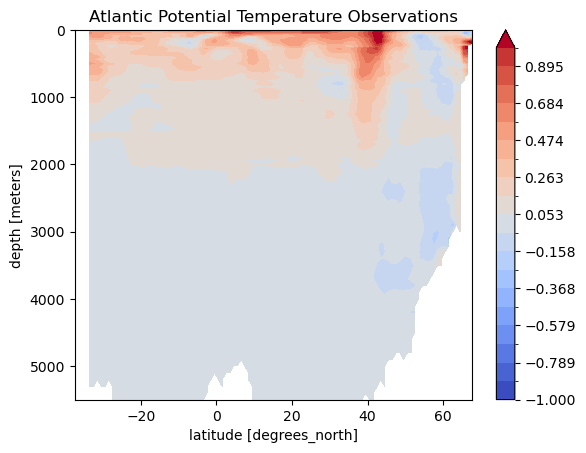

In [64]:
# plotting the Atlantic Potential Temperature Observations decreasing with depth. 
difference55_17.sel(lat=slice(-38,68)).mean(dim='lon').plot.contourf(yincrease=False, 
    vmin = -1, vmax= 1, cmap = 'coolwarm', levels = 20)
plt.title('Atlantic Potential Temperature Observations')

#### <font >**Figure  18.**</font>  Atlantic Potential Temperature Observations from the decadel difference of (2005-2017) - (1955 - 1964). The data was provided by World Ocean Atlas 2018 Potential Temperaturem NOAA National Centers for Environmental Information Dataset. 

Text(0.5, 1.0, 'Atlantic Potential Temperature Model')

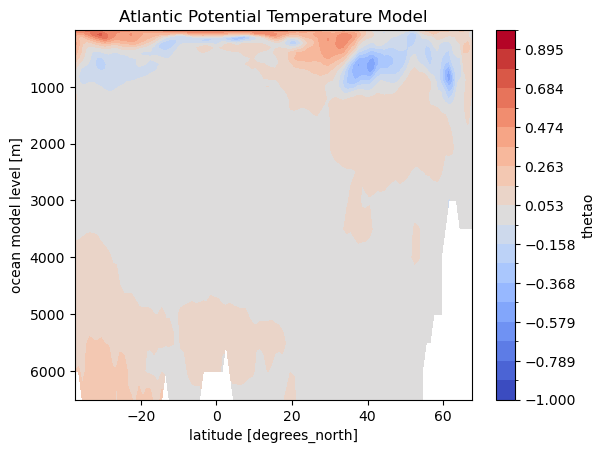

In [65]:
# plotting the Atlantic Potential Temperature Model decreasing with depth. 

difference55_17_esm4.sel(latitude=slice(-38, 68)).mean(dim='longitude').plot.contourf(yincrease=False,
  vmin = -1, vmax = 1, cmap = 'coolwarm', levels = 20)
plt.title('Atlantic Potential Temperature Model')

#### <font >**Figure  19.**</font>  Atlantic Potential Temperature Model from the decadel difference of (2005-2017) - (1955 - 1964). The data was provided by GFDL-ESM4 Earth System Model developed at NOAA's Geophysical Fluid Dynamics Laboratory (GFDL), historical experiment, CMIP6. 

# In this notebook I analayzed the observed sea temperatures in the Atlantic Ocean as well as the Steric sea level variation in all global ocean basins. I used the skills that I aquired from the notebook that were taught in class. The conclusions that I came to were that we have seen a trend of steady increasing of steric sea level in the last 17 years from the observed data. Also, the area near the gulf stream in the Atlantic Ocean has been warming rapidly, and that the Atlantic Ocean is one of the basins that is increasing in temperature the most.